# Übung 6

**Gruppenname:**

*TLJ*

Christian Rene Thelen, Artur Less, Karl Johannes

### 6.1 Staudamm - Revisited

* In dieser Übung geht es darum, Sie mit der Python Machine Learning Bibliothek [scikit-learn](https://scikit-learn.org/stable/) vertraut zu machen, die wir in manchen der kommenden Übungen benötigen werden. Scikit-Learn ist eine beliebte Machine Learning Bibliothek, auf die Sie zwangsläufig treffen, wenn Sie Ihre Projekte in Python Implementieren. Um Sie mit Scikit-Learn vertraut zu machen, beschäftigen wir uns weiter mit dem Lernproblem aus **Übung 5**. Diese Übung ist besonders wichtig für Ihre weitere Vorbereitung. Sie zeigt ein klassisches Vorgehen im Machine Learning.
* Obwohl Sie in dieser Übung Scikit-Learn kennenlernen werden, mit der Sie viele Aufgaben schnell erledigen können, werden Sie in den kommenden Übungen trotzdem Methoden auch selbst implementieren. Dies dient dazu, Ihren Lernerfolg zu erhöhen.

Sie haben in der Vorlesung gelernt, dass es viele verschiedene Regularisierungstechniken gibt. Unter anderem lässt sich die strikte Beschränkung der Modellordnung (hier: der Ordnung $Q$ der Polynome) als Regularisierung unseres Hypothesensets interpretieren. Im Vergleich zu Übung 5.1 werden wir hier untersuchen, wie wir sowohl den Parameter $\lambda$ für die Weight Decay-Regularisierung als auch den Parameter $Q$ für die Polynomordnung gleichzeitig einstellen können. Diese Parameter $(Q, \lambda)$ bilden eine Parameterlandschaft, die wir untersuchen werden. Dazu werden wir in diese Landschaft ein Gitter (grid) legen, an dessen Knoten wir jeweils über eine *V*-fache Kreuzvalidierung einen Kreuzvalidierungsfehler bestimmen werden. Zum Schluss werden wir das Parameterpaar $(Q^*, \lambda^*)$ auswählen, für das der Kreuzvalidierungsfehler am kleinsten wird.

* Diese Übung ist recht frei gehalten. Sie können sich gerne die übergeordneten Ziele der Übung ansehen und dann gleich mit Schritt (5) in die Implementierung starten. 
* Diejenigen unter Ihnen, die etwas Hilfestellung benötigen, werde ich in den unten stehenden Schritten (1)-(4) an die Implementierung mit verschiedenen Tipps heranführen.
* Benutzen Sie in dieser Übung *nicht* Ihren eigenen früheren Code. Benutzen Sie stattdessen Befehle von Scikit-Learn und Numpy.

**Übergeordnete Ziele** (weiter unten finden Sie diese Schritte detaillierter aufgeschlüsselt)
1. Implementieren Sie mit Scikit-Learn eine Weight-Decay regularisierte lineare Regression mit polynomieller Feature Transformation. Skalieren Sie dabei die Features mit MinMax-Scaling (und verstehen Sie, was dies bedeutet). **Erzeugen Sie aus den Prozessierungsschritten eine Pipeline.**
2. Führen Sie auf diesem Modell eine Hyperparametersuche mithilfe von *V*-facher Kreuzvalidierung für das Suchgitter $(\lambda, Q)$ durch, mit $\lambda \in \{0, 0.25, 0.5, \ldots 5\}$ und $Q = \{1, \ldots, 8 \}$.
3. Ihre Endprodukt ist eine Visualisierung des durch die *V*-fache Kreuzvalidierung ($V=5$) erhaltenen Kreuzvalidierungsfehler, aus dem Sie die optimalen Parameter $(\lambda^*, Q^*)$ ablesen und angeben werden (wie in Übung 5.2 Schritt 4).

In [15]:
%matplotlib inline
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import sklearn as skl
from io import BytesIO
import urllib.request

# Sie finden diese Daten auch zum Download unter: https://data.bialonski.de/ml/water-dam-data.mat
file = urllib.request.urlopen('https://data.bialonski.de/ml/water-dam-data.mat')
data = loadmat(BytesIO(file.read()))

**Ihre Aufgaben**

(1) Wir bauen zunächst gemeinsam an den einzelnen Schritten der Pipeline unseres Machine Learning Verfahrens. Machen Sie sich mit dem Interface des Objektes vertraut, das die [Skalierung der Features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) übernimmt. Probieren Sie testweise aus, wie die Methoden `fit` und `transform` arbeiten.

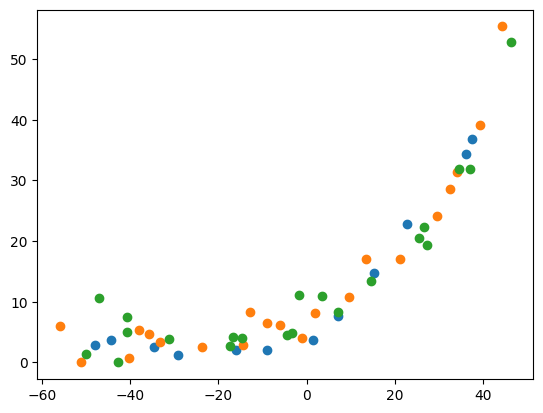

In [102]:
plt.scatter(data['X'], data['y'])
plt.scatter(data['Xtest'], data['ytest'])
plt.scatter(data['Xval'], data['yval'])

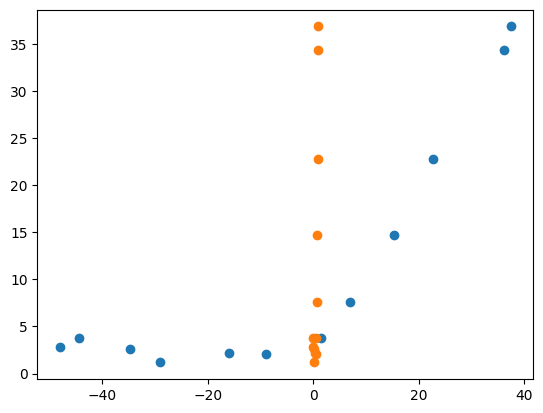

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data['X'])
scaler.data_max_
x_scaled = scaler.transform(data['X'])

plt.scatter(data['X'], data['y'])
plt.scatter(x_scaled, data['y'])

(2) Machen Sie sich mit dem Interface der [Polynomiellen Feature Transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) bekannt, die scikit-learn bereitstellt. Manche von Ihnen haben damit in der Vergangenheit bereits gearbeitet. Wie lässt sich der Grad des Polynoms einstellen? Nutzen Sie die Feature Transformation, um testweise Ihre aus dem Schritt (1) skalierten Features mit $Q=8$ zu transformieren.

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(8)
x_transformed = poly.fit_transform(x_scaled)

(3) Die lineare Regression mit Weight Decay wird auch *Ridge Regression* genannt. Machen Sie sich mit der [Implementierung dieses Lernmodels](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) in scikit-learn vertraut. Mit welchem Parameter können Sie die Regularisierungsstärke $\lambda$ einstellen? Fitten Sie testweise einmal dieses Modell mit $\lambda=0$ (Methode `fit`), an die Daten die Sie in Schritt (2) transformiert hatten. 

In [48]:
from sklearn.linear_model import Ridge
# Ridge: Linear least squares with l2 regularization
# regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. 
# Also known as Ridge Regression or Tikhonov regularization, or lineare Regression mit Weight Decay
# alpha: Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates.
data_fit = Ridge(alpha=0).fit(x_transformed, data['y'])

(4) Erzeugen Sie mit der Methode `predict` Vorhersagen auf Ihren Trainingsdaten. Visualisieren Sie sich die Vorhersagen und die echten Labels in einem Plot.

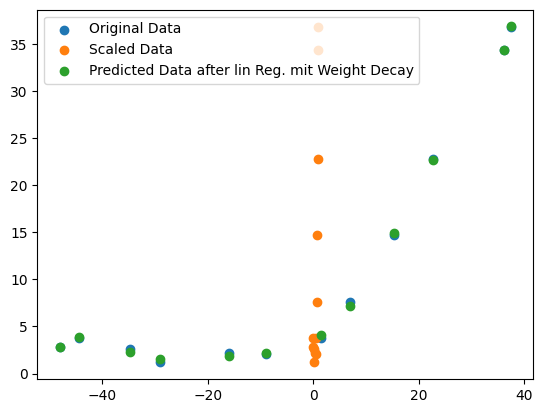

In [68]:
plt.scatter(data['X'], data['y'], label="Original Data")
plt.scatter(x_scaled, data['y'], label="Scaled Data")
plt.scatter(data['X'], data_fit.predict(x_transformed), label="Predicted Data after lin Reg. mit Weight Decay")
plt.legend(loc='upper left', fancybox=True)
plt.show()

(5) Die in (1)-(3) durchgeführten Schritte (`MinMaxScaler, PolynomialFeature, Ridge`) können als Transformationen der Ursprungsfeatures aufgefasst werden. Wir werden diese Schritte in einer sogenannten *Pipeline* zusammenfassen. Machen Sie sich mit [Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) und ihrer Schnittstelle bei scikit-learn vertraut, um die Schritte (1)-(3) in einer Pipeline zusammenzufassen. Dieses [Beispiel](https://scikit-learn.org/stable/modules/compose.html#construction) verdeutlicht die Konstruktion der Pipeline als `(key,value)` Paare in einem `list` Objekt. Die Namen, die Sie den einzelnen Schritten geben können, werden in der nächsten Aufgabe benötigt.
Fitten Sie testweise diese Pipeline an Ihre Trainingsdaten (Methode `fit`) und lassen Sie Ihre trainierte Pipeline aus den Trainingsfeatures die Labels (y-Werte) vorhersagen (Methode `predict`).

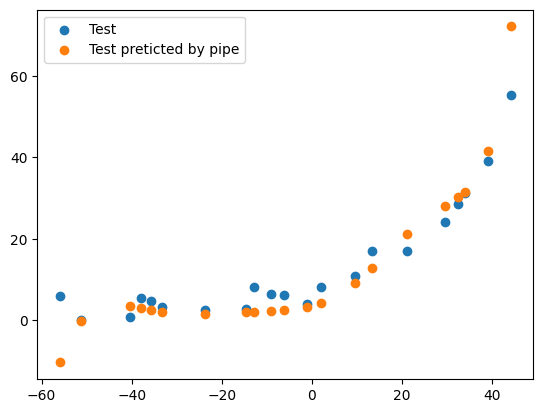

Score x: 0.9996297877703566
Score x_val: 0.33336386039765753
Score x_test: 0.8299783544764279


In [121]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('MinMaxScaler', MinMaxScaler()),
    ('PolynomialFeature', PolynomialFeatures(8)),
    ('Ridge', Ridge(alpha=0.))
])

pipe.fit(data['X'], data['y'])

plt.scatter(data['Xtest'], data['ytest'], label="Test")
plt.scatter(data['Xtest'], pipe.predict(data['Xtest']), label="Test preticted by pipe")
plt.legend(loc='upper left', fancybox=True)
plt.show()

print("Score x:", pipe.score(data['X'], data['y']))
print("Score x_val:", pipe.score(data['Xval'], data['yval']))
print("Score x_test:", pipe.score(data['Xtest'], data['ytest']))

(6) Wir benutzen nun die Pipeline, um eine Gittersuche samt *V*-facher Kreuzvalidierung durchzuführen. Dazu machen Sie sich bitte mit [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) vertraut. [Dieses](https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py) Beispiel und die folgenden Hinweise könnten dazu hilfreich sein:
* Als `estimator` Objekt kann die eben konstruierte Pipeline übergeben werden. 
* Die Suchparameter (`param_grid`) werden in Dictionaries definiert;
    * Die Schlüssel sind nach folgendem Schema aufgebaut: 'name__parameter'. Mit *name* sind die von Ihnen definierten Namen der Pipeline Schritte aus der letzten Teilaufgabe gemeint. Mit *parameter* der Parameter des jeweiligen `estimator`.
    * Definieren Sie ein Suchparameter-Dictionary mit $\lambda \in \{0, 0.25, 0.5, \ldots 5\}$ und $Q=8$.
* Setzen Sie die Anzahl der Folds $V=5$. 
* Nutzen Sie als Scoring Function die Option 'neg_mean_squared_error'.

Benutzen Sie die Methode `fit` um die Pipeline für alle Parameter des Grids an die Trainingsdaten zu fitten.

(7) Die Methode `.cv_results_` liefert Ihnen die Ergebnisse der Gittersuche. Untersuchen Sie diese Ergebnisse und entwickeln Sie ein Verständnis dafür, wo Sie welche Ergebnisse finden. Extrahieren Sie die Kreuzvalidierungsfehler aus `.cv_results_` und plotten Sie sie als Funktion des Regularisierungsparameters $\lambda$.

(8) Bauen Sie auf den Ergebnissen des Schritts (6) auf und implementieren nun eine Gittersuche, die das Gitter für $\lambda$ und $Q$ in dem Bereich untersucht, der bei den übergeordneten Zielen definiert ist. Extrahieren Sie den Kreuzvalidierungsfehler für jeden Punkt des Gitters.

(9) Visualisieren Sie mit [plt.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) die Kreuzvalidierungsfehler, die ihre Gittersuche ergeben hat. Bedenken Sie dabei, dass Sie in Schritt (6) als Scoring-Function den negativen mittleren quadratischen Fehler ausgewählt haben ('neg_mean_squared_error'). Sie müssen also für die Darstellung des gemittelten quadratischen Fehlers (den Sie aus der Vorlesung kennen) die erhaltenen Werte noch mit dem Faktor "-1" multiplizieren. Welche optimalen Parameter $(\lambda^*, Q^*)$ haben Sie ermittelt (`.best_params_`)?